In [136]:
import datasets as k
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, mean_squared_error, classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2, f_classif, mutual_info_classif, SelectPercentile, SelectFwe
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from xgboost import XGBClassifier
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
import xgboost as xgb
importlib.reload(k)
import random
random.seed(100)

In [99]:
importlib.reload(k)
x,y,e = k.q3b()

In [100]:
x.shape

(19962, 60)

In [101]:
y.shape

(19962,)

CV score:  0.8577511660230963
XGB Classifier: 86.19%


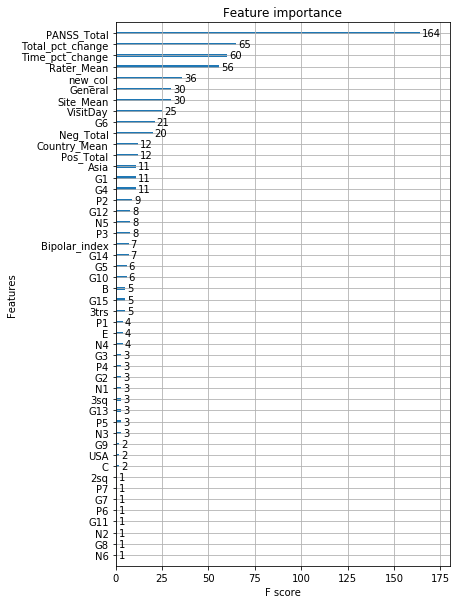

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
model = xgb.XGBRegressor(objective="reg:squarederror")
model.fit(x_train, y_train)
predict = model.predict(x_test)
score = model.score(x_test, y_test)
print("CV score: ", np.mean(cross_val_score(model, x_test, y_test, cv=10)))
print("XGB Classifier: %.2f%%" % (score * 100.0))
ax = plot_importance(model)
fig = ax.figure
fig.set_size_inches(6, 10)
pyplot.show()

## XGB Regressor

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
model = xgb.XGBRegressor(objective="reg:squarederror")
model.fit(x_train, y_train)
predict = model.predict(x_test)
score = model.score(x_test, y_test)
print("CV score: ", np.mean(cross_val_score(model, x_test, y_test, cv=10)))
print("XGB Classifier: %.2f%%" % (score * 100.0))

CV score:  0.8634159157741509
XGB Classifier: 87.64%


In [97]:
predicted = model.predict(e)
data = k.predict_regression(predicted)
data.to_csv("reg123.csv", index=False)

## Linear Regression

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
model = LinearRegression()
model.fit(x_train, y_train)
predict = model.predict(x_test)
score = model.score(x_test, y_test)
print("CV score: ", np.mean(cross_val_score(model, x_test, y_test, cv=10)))
print("Linear Classifier: %.2f%%" % (score * 100.0))

CV score:  0.8446330565440568
Linear Classifier: 84.83%


## LASSO Regression

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
model = linear_model.Lasso(alpha=0.1)
model.fit(x_train, y_train)
predict = model.predict(x_test)
score = model.score(x_test, y_test)
print("CV score: ", np.mean(cross_val_score(model, x_test, y_test, cv=10)))
print("Lasso Regression: %.2f%%" % (score * 100.0))

CV score:  0.8572429923742654
Linear Classifier: 85.76%


In [117]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
n_estimators = np.linspace(0.1, 1, 10, endpoint=True)
for estimator in n_estimators:
    model = linear_model.Lasso(alpha=estimator)
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    score = model.score(x_test, y_test)
    print("CV score: ", estimator, np.mean(cross_val_score(model, x_test, y_test, cv=10)))
    print("Lasso Regression: %.2f%%" % (score * 100.0))

CV score:  0.1 0.8546098019727534
Linear Classifier: 85.63%
CV score:  0.2 0.8539092858923333
Linear Classifier: 85.52%
CV score:  0.30000000000000004 0.8532607952345078
Linear Classifier: 85.43%
CV score:  0.4 0.8531678093323173
Linear Classifier: 85.41%
CV score:  0.5 0.8530022035951177
Linear Classifier: 85.39%
CV score:  0.6 0.852828074676918
Linear Classifier: 85.38%
CV score:  0.7000000000000001 0.8526867943721239
Linear Classifier: 85.37%
CV score:  0.8 0.8525708162961385
Linear Classifier: 85.36%
CV score:  0.9 0.8524939636658058
Linear Classifier: 85.36%
CV score:  1.0 0.852460805762416
Linear Classifier: 85.35%


## AdaBoost Regression

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
model = AdaBoostRegressor()
model.fit(x, y)   
model.fit(x_train, y_train)
predict = model.predict(x_test)
score = model.score(x_test, y_test)
print("CV score: ", np.mean(cross_val_score(model, x_test, y_test, cv=10)))
print("AdaBoost Regression: %.2f%%" % (score * 100.0))

CV score:  0.7644089077987196
AdaBoost Regression: 71.29%


## Random Forest Regression

In [135]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
model = RandomForestRegressor(max_depth=4)
model.fit(x, y)   
model.fit(x_train, y_train)
predict = model.predict(x_test)
score = model.score(x_test, y_test)
print("CV score: ", np.mean(cross_val_score(model, x_test, y_test, cv=10)))
print("Random Forest Regression: %.2f%%" % (score * 100.0))

CV score:  0.8440892843571641
Random Forest Regression: 84.56%
